Connected to base (Python 3.10.9)

In [ ]:
# Check for missing values
print(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].isnull().sum())

NameError: name 'df' is not defined

In [ ]:
# Define the indicators to download
indicators = {
    'gdp_per_capita': 'NY.GDP.PCAP.CD',
    'gdp_growth_rate': 'NY.GDP.MKTP.KD.ZG',
    'inflation_rate': 'FP.CPI.TOTL.ZG',
    'unemployment_rate': 'SL.UEM.TOTL.ZS',
    'total_population': 'SP.POP.TOTL',
    'life_expectancy': 'SP.DYN.LE00.IN',
    'adult_literacy_rate': 'SE.ADT.LITR.ZS',
    'income_inequality': 'SI.POV.GINI',
    'health_expenditure_gdp_share': 'SH.XPD.CHEX.GD.ZS',
    'measles_immunisation_rate': 'SH.IMM.MEAS',
    'education_expenditure_gdp_share': 'SE.XPD.TOTL.GD.ZS',
    'primary_school_enrolment_rate': 'SE.PRM.ENRR',
    'exports_gdp_share': 'NE.EXP.GNFS.ZS'
}

# Get the list of country codes for the "World" region
country_codes = wb.region.members('WLD')

# Download data for countries only in 2022
df = wb.data.DataFrame(indicators.values(), economy=country_codes, time=2022, skipBlanks=True, labels=True).reset_index()

# Delete the 'economy' column
df = df.drop(columns=['economy'], errors='ignore')

# Create a reversed dictionary mapping indicator codes to names
# Rename the columns and convert all names to lowercase
df.rename(columns=lambda x: {v: k for k, v in indicators.items()}.get(x, x).lower(), inplace=True)

# Sort 'country' in ascending order
df = df.sort_values('country', ascending=True)

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the data
print(df.head(3))

# Save the data to a CSV file
df.to_csv('wdi.csv', index=False)

NameError: name 'wb' is not defined

In [ ]:
#Import the libraries
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the indicators to download
indicators = {
    'gdp_per_capita': 'NY.GDP.PCAP.CD',
    'gdp_growth_rate': 'NY.GDP.MKTP.KD.ZG',
    'inflation_rate': 'FP.CPI.TOTL.ZG',
    'unemployment_rate': 'SL.UEM.TOTL.ZS',
    'total_population': 'SP.POP.TOTL',
    'life_expectancy': 'SP.DYN.LE00.IN',
    'adult_literacy_rate': 'SE.ADT.LITR.ZS',
    'income_inequality': 'SI.POV.GINI',
    'health_expenditure_gdp_share': 'SH.XPD.CHEX.GD.ZS',
    'measles_immunisation_rate': 'SH.IMM.MEAS',
    'education_expenditure_gdp_share': 'SE.XPD.TOTL.GD.ZS',
    'primary_school_enrolment_rate': 'SE.PRM.ENRR',
    'exports_gdp_share': 'NE.EXP.GNFS.ZS'
}

# Get the list of country codes for the "World" region
country_codes = wb.region.members('WLD')

# Download data for countries only in 2022
df = wb.data.DataFrame(indicators.values(), economy=country_codes, time=2022, skipBlanks=True, labels=True).reset_index()

# Delete the 'economy' column
df = df.drop(columns=['economy'], errors='ignore')

# Create a reversed dictionary mapping indicator codes to names
# Rename the columns and convert all names to lowercase
df.rename(columns=lambda x: {v: k for k, v in indicators.items()}.get(x, x).lower(), inplace=True)

# Sort 'country' in ascending order
df = df.sort_values('country', ascending=True)

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the data
print(df.head(3))

# Save the data to a CSV file
df.to_csv('wdi.csv', index=False)

(217, 14)
       country  inflation_rate  exports_gdp_share  gdp_growth_rate  \
0  Afghanistan             NaN          18.380042        -6.240172   
1      Albania        6.725203          37.197085         4.826688   
2      Algeria        9.265516          30.808979         3.600000   

   gdp_per_capita  adult_literacy_rate  primary_school_enrolment_rate  \
0      357.261153                  NaN                            NaN   
1     6846.426143                 98.5                      96.371231   
2     4961.552577                  NaN                     108.343933   

   education_expenditure_gdp_share  measles_immunisation_rate  \
0                              NaN                       56.0   
1                         2.744330                       86.0   
2                         4.749247                       79.0   

   health_expenditure_gdp_share  income_inequality  unemployment_rate  \
0                           NaN                NaN             14.100   
1        

In [ ]:
# Check for missing values
print(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].isnull().sum())

life_expectancy                   8
health_expenditure_gdp_share    197
gdp_per_capita                   10
dtype: int64


In [ ]:
# Summary statistics
print(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].describe())

       life_expectancy  health_expenditure_gdp_share  gdp_per_capita
count       209.000000                     20.000000      207.000000
mean         72.416519                      9.044045    20520.336828
std           7.713322                      2.703549    30640.741594
min          52.997000                      5.100000      250.634225
25%          66.782000                      7.263266     2599.752468
50%          73.514634                      8.925000     7606.237525
75%          78.475000                     10.632500    27542.145523
max          85.377000                     16.571152   226052.001905


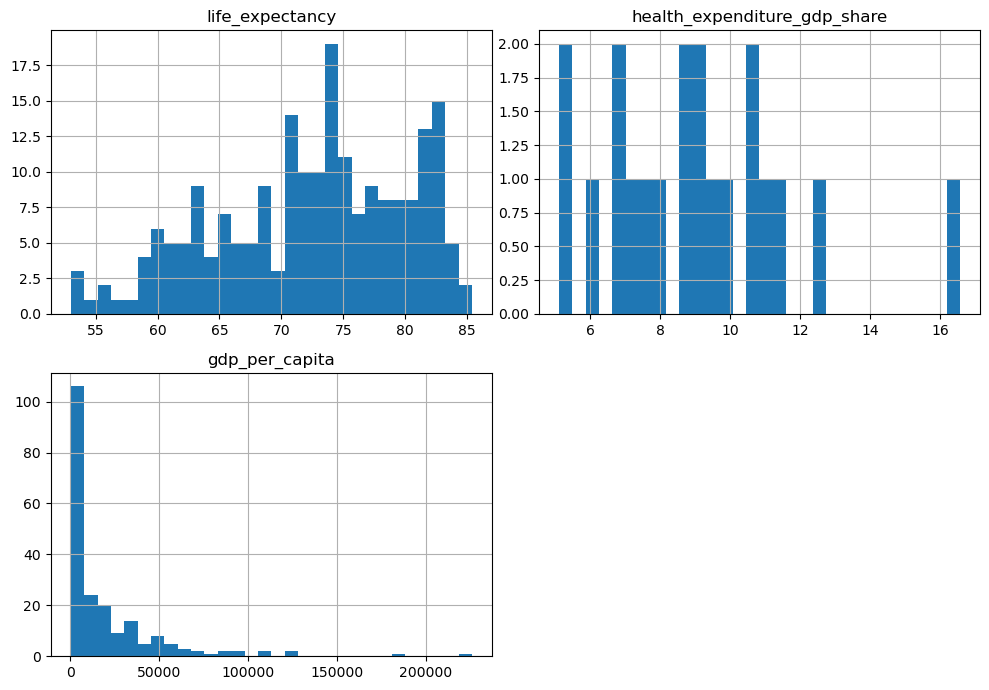

In [ ]:
# Histograms
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.show()

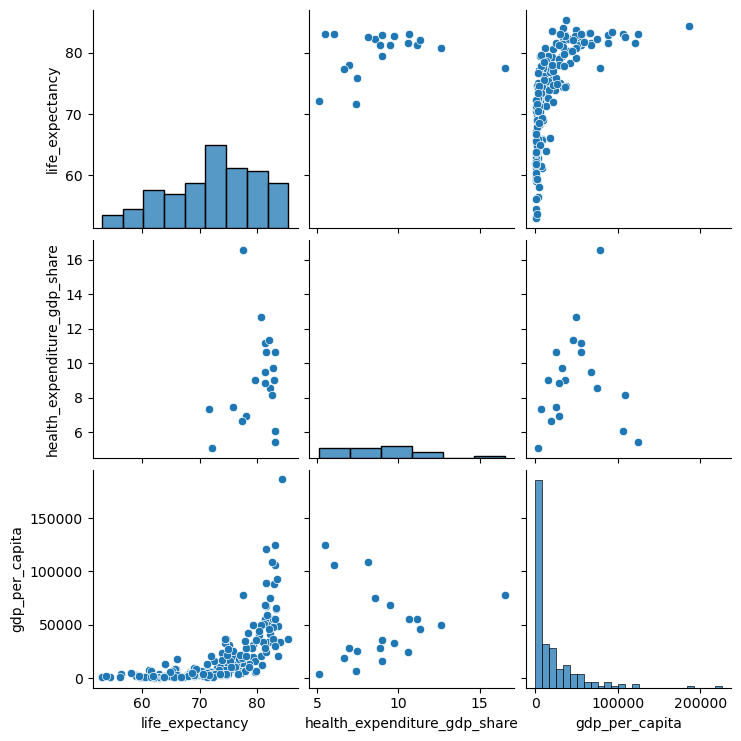

In [ ]:
# Pairplot to see relationships
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.show()

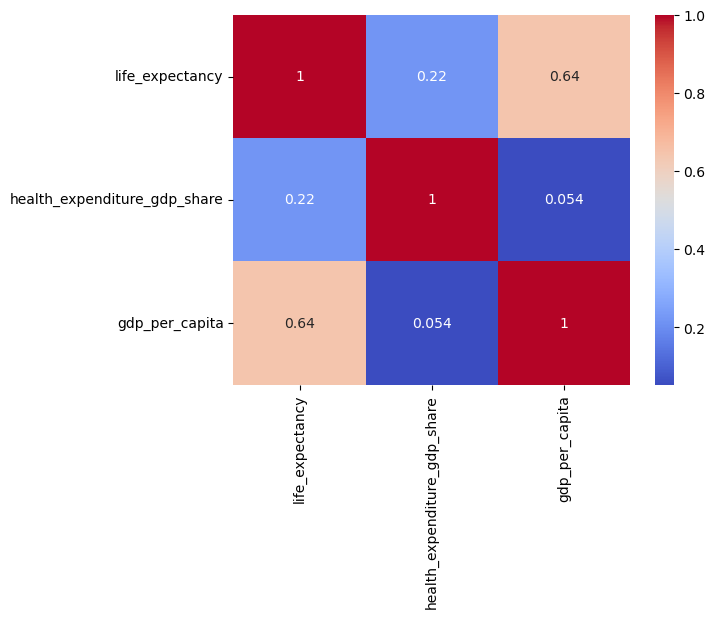

In [ ]:
# Correlation matrix
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Connected to base (Python 3.10.9)

In [ ]:
# Correlation matrix
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'df' is not defined

(217, 14)
       country  inflation_rate  exports_gdp_share  gdp_growth_rate  \
0  Afghanistan             NaN          18.380042        -6.240172   
1      Albania        6.725203          37.197085         4.826688   
2      Algeria        9.265516          30.808979         3.600000   

   gdp_per_capita  adult_literacy_rate  primary_school_enrolment_rate  \
0      357.261153                  NaN                            NaN   
1     6846.426143                 98.5                      96.371231   
2     4961.552577                  NaN                     108.343933   

   education_expenditure_gdp_share  measles_immunisation_rate  \
0                              NaN                       56.0   
1                         2.744330                       86.0   
2                         4.749247                       79.0   

   health_expenditure_gdp_share  income_inequality  unemployment_rate  \
0                           NaN                NaN             14.100   
1        

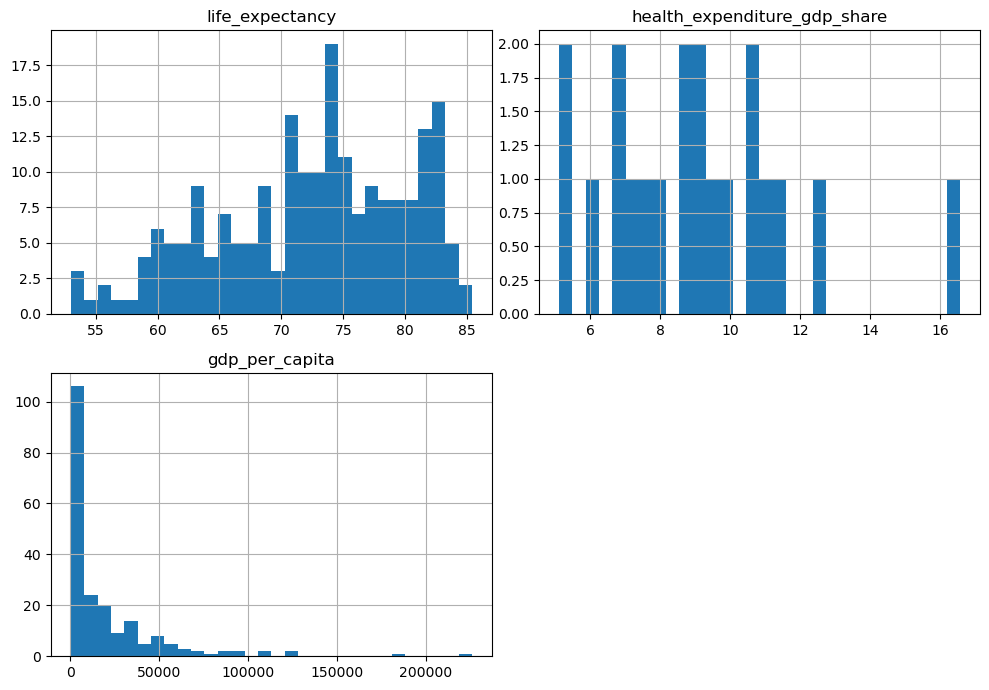

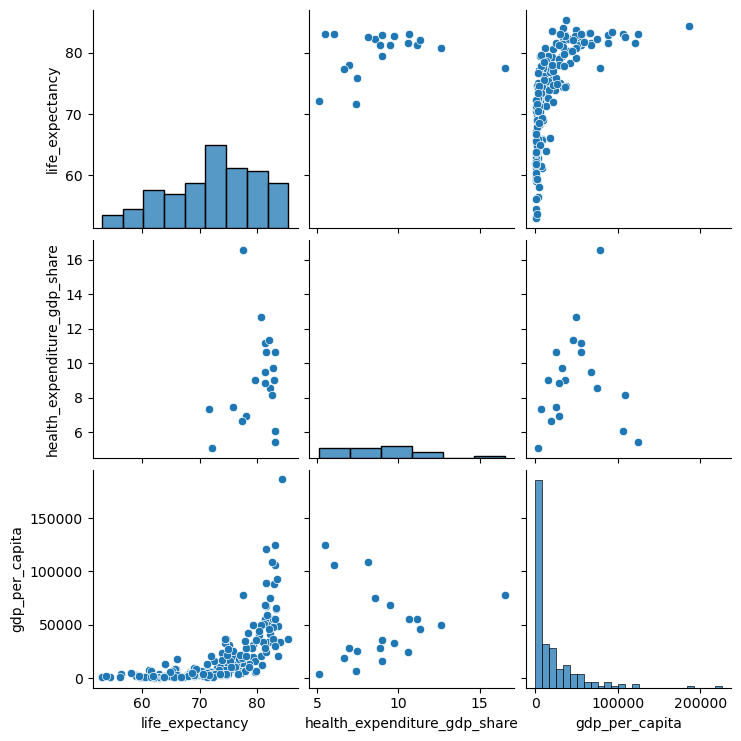

In [ ]:
#Import the libraries
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns

# Define the indicators to download
indicators = {
    'gdp_per_capita': 'NY.GDP.PCAP.CD',
    'gdp_growth_rate': 'NY.GDP.MKTP.KD.ZG',
    'inflation_rate': 'FP.CPI.TOTL.ZG',
    'unemployment_rate': 'SL.UEM.TOTL.ZS',
    'total_population': 'SP.POP.TOTL',
    'life_expectancy': 'SP.DYN.LE00.IN',
    'adult_literacy_rate': 'SE.ADT.LITR.ZS',
    'income_inequality': 'SI.POV.GINI',
    'health_expenditure_gdp_share': 'SH.XPD.CHEX.GD.ZS',
    'measles_immunisation_rate': 'SH.IMM.MEAS',
    'education_expenditure_gdp_share': 'SE.XPD.TOTL.GD.ZS',
    'primary_school_enrolment_rate': 'SE.PRM.ENRR',
    'exports_gdp_share': 'NE.EXP.GNFS.ZS'
}

# Get the list of country codes for the "World" region
country_codes = wb.region.members('WLD')

# Download data for countries only in 2022
df = wb.data.DataFrame(indicators.values(), economy=country_codes, time=2022, skipBlanks=True, labels=True).reset_index()

# Delete the 'economy' column
df = df.drop(columns=['economy'], errors='ignore')

# Create a reversed dictionary mapping indicator codes to names
# Rename the columns and convert all names to lowercase
df.rename(columns=lambda x: {v: k for k, v in indicators.items()}.get(x, x).lower(), inplace=True)

# Sort 'country' in ascending order
df = df.sort_values('country', ascending=True)

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the number of rows and columns
print(df.shape)

# Display the first few rows of the data
print(df.head(3))

# Save the data to a CSV file
df.to_csv('wdi.csv', index=False)

# Summary statistics
print(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].describe())

# Histograms
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.show()

# Pairplot to see relationships
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.show()

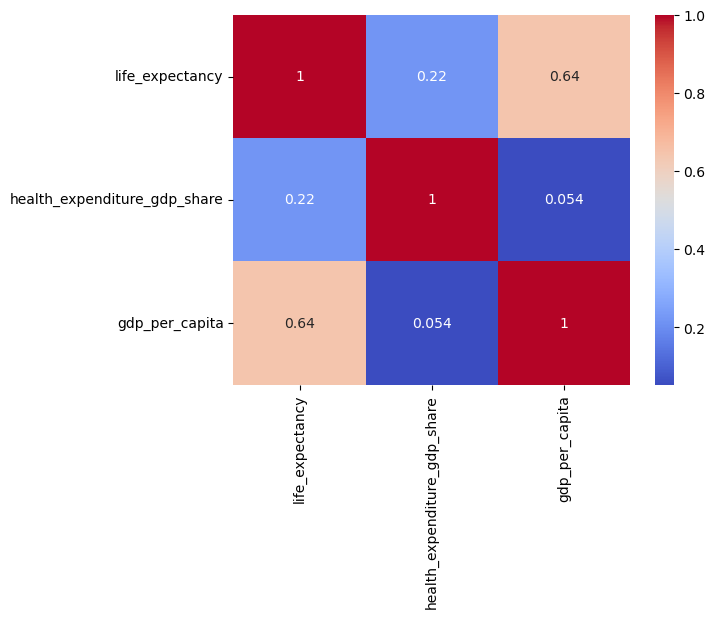

In [ ]:
# Correlation matrix
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

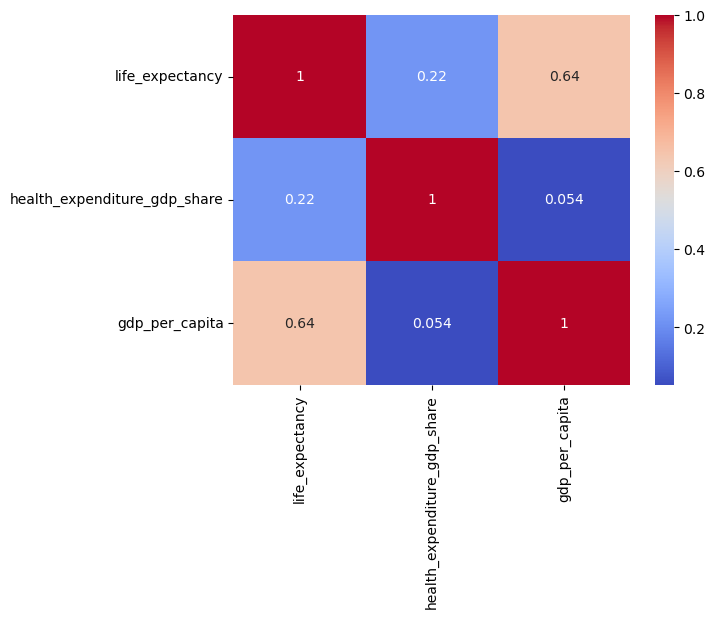

In [ ]:
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
| echo: false
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-a534e87282a8>, line 1)

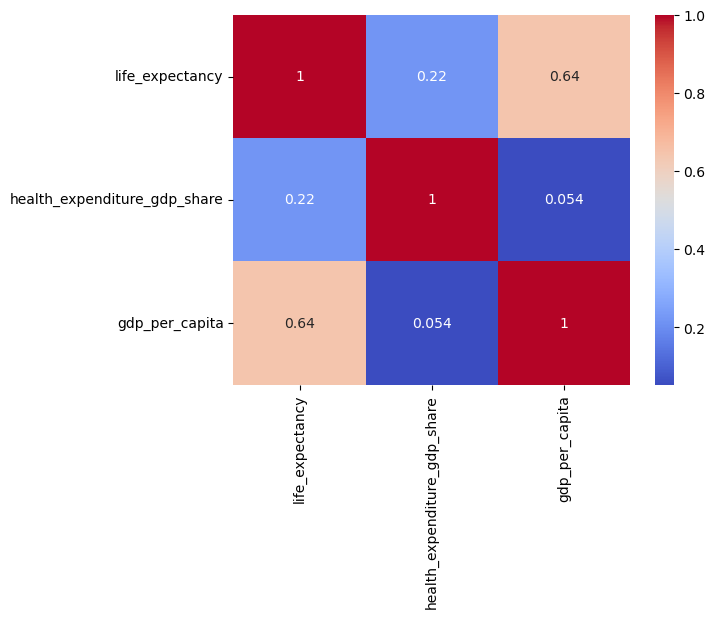

In [ ]:
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

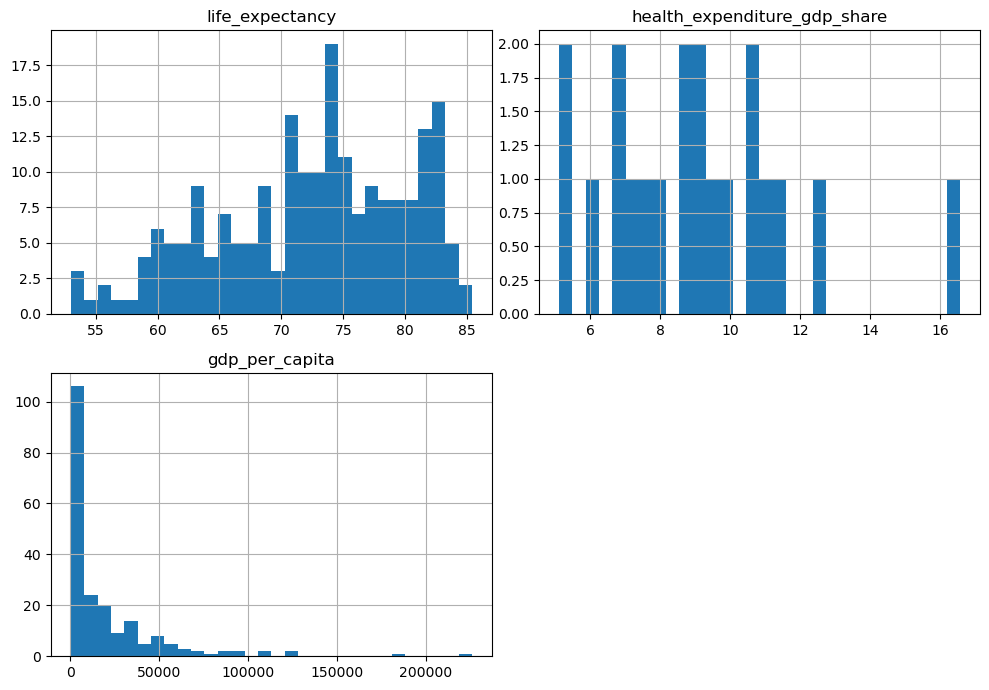

In [ ]:
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.title("Histograms of Selectred Indicators")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_title'

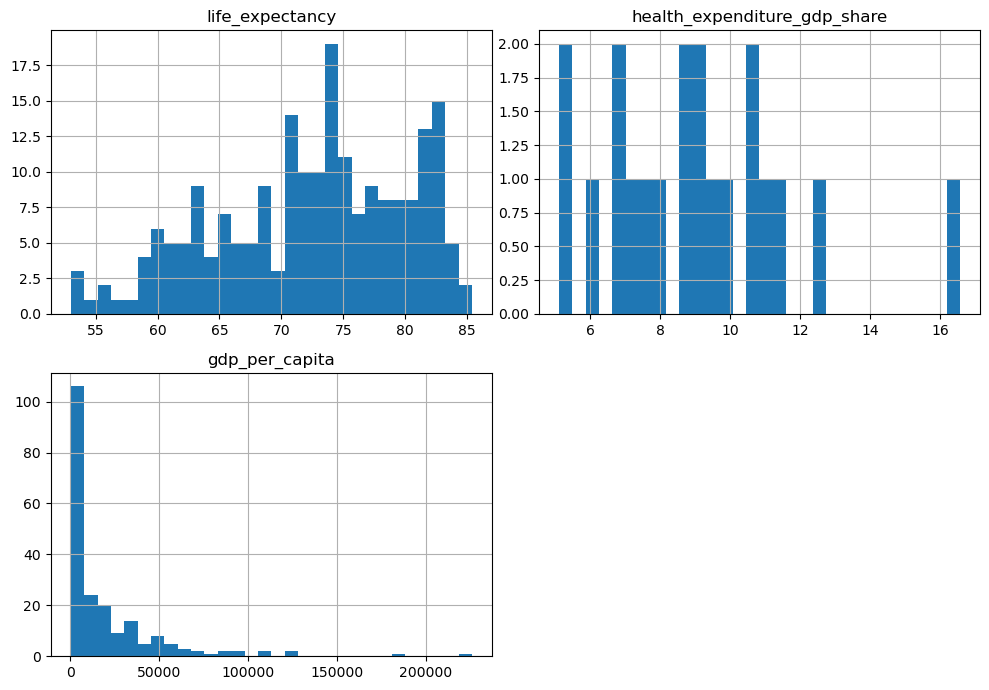

In [ ]:
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.add_title("Histograms of Selectred Indicators")
plt.show()

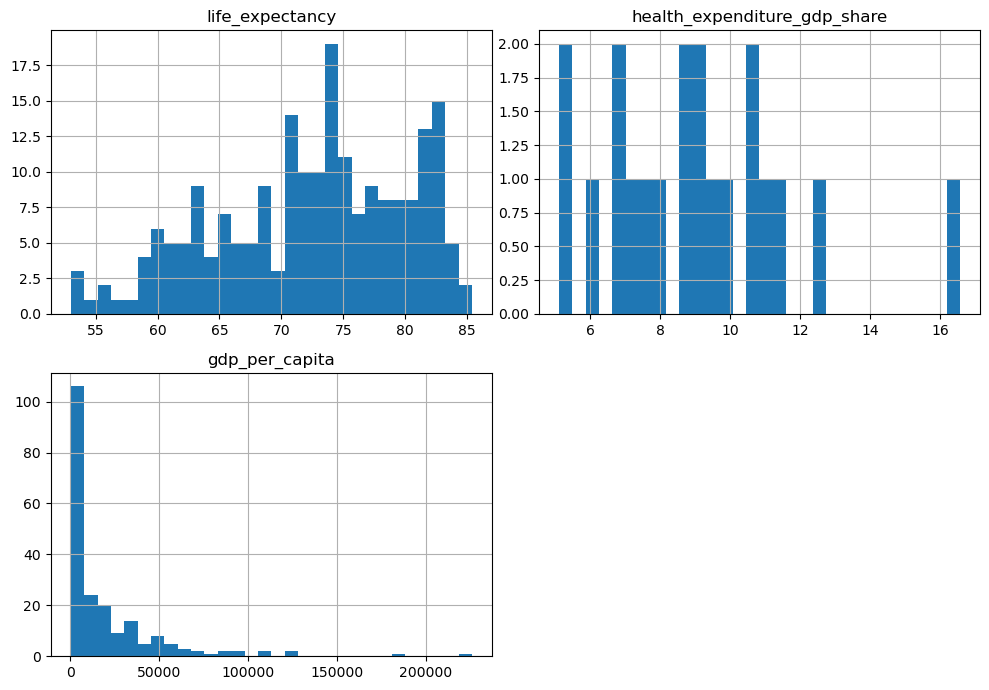

In [ ]:
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.title(label="Histograms of Selectred Indicators")
plt.show()

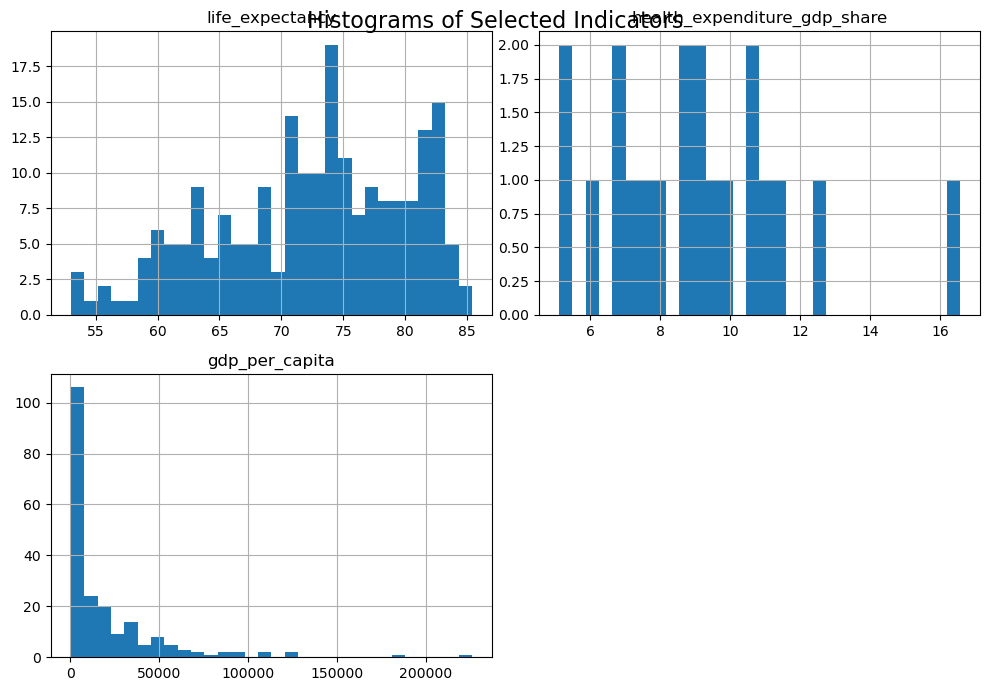

In [ ]:
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.suptitle("Histograms of Selected Indicators", fontsize=16)
plt.show()

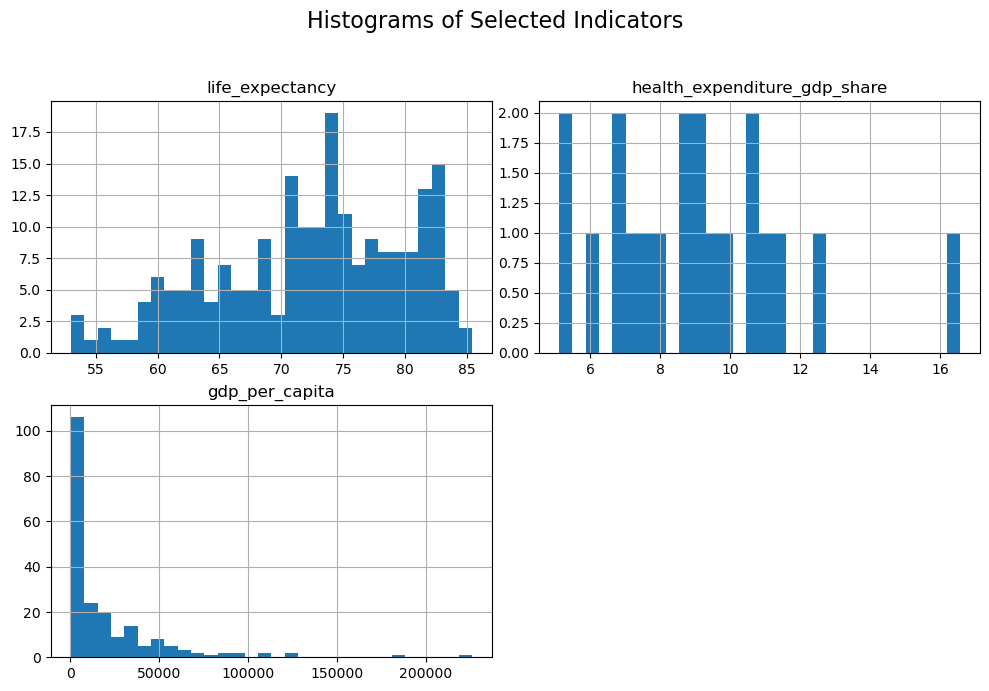

In [ ]:
df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.suptitle("Histograms of Selected Indicators", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

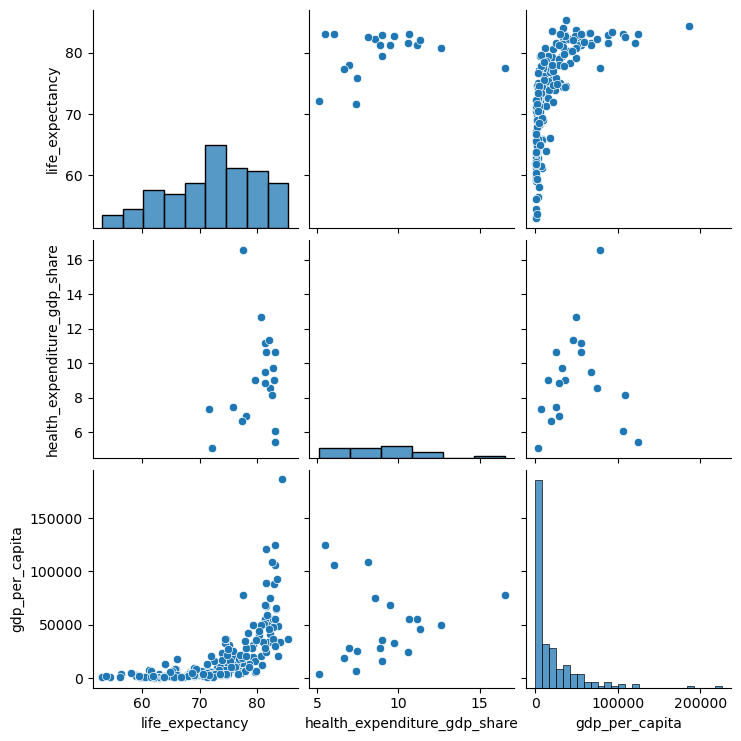

In [ ]:
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.show()

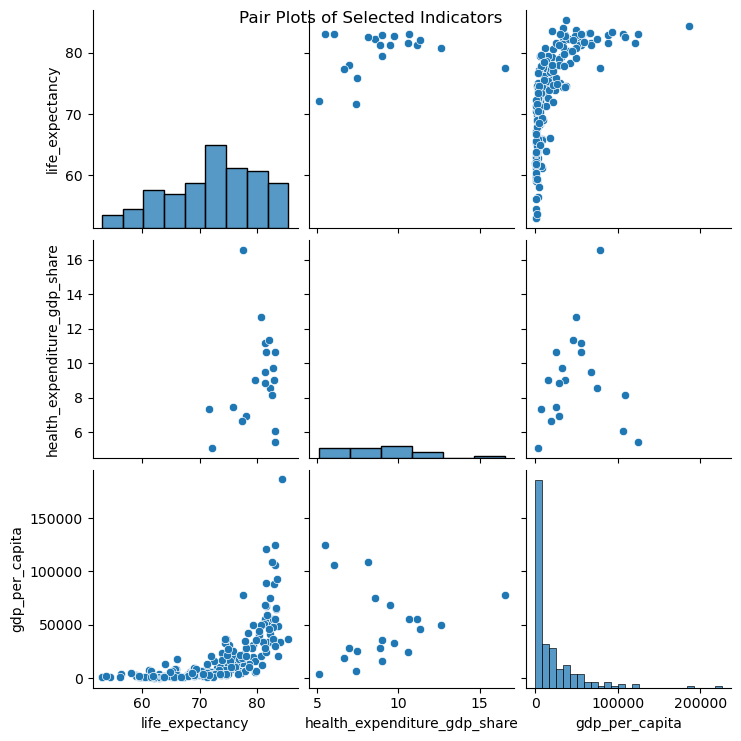

In [ ]:
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.suptitle("Pair Plots of Selected Indicators")
plt.show()

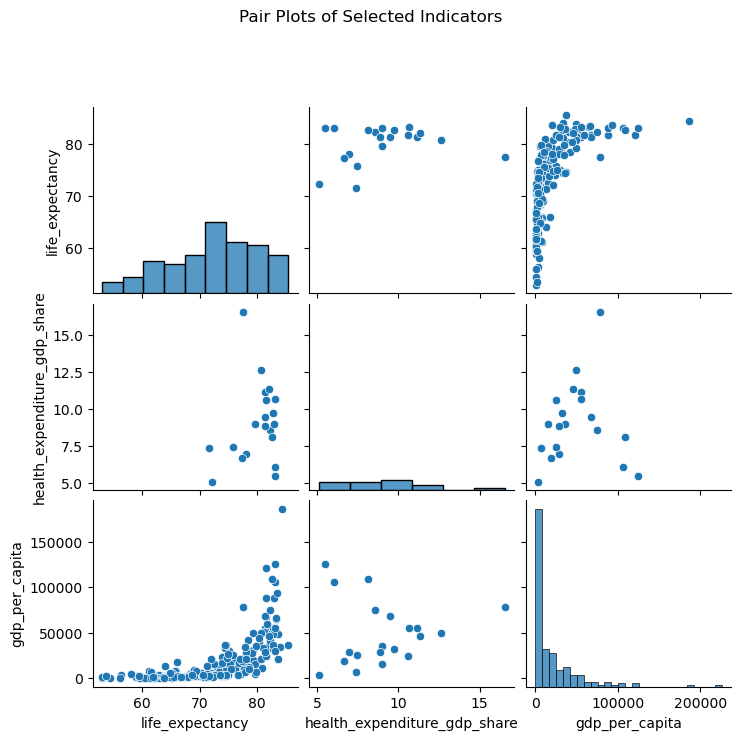

In [ ]:
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.suptitle("Pair Plots of Selected Indicators")
plt.subplots_adjust(top=0.85)
plt.show()

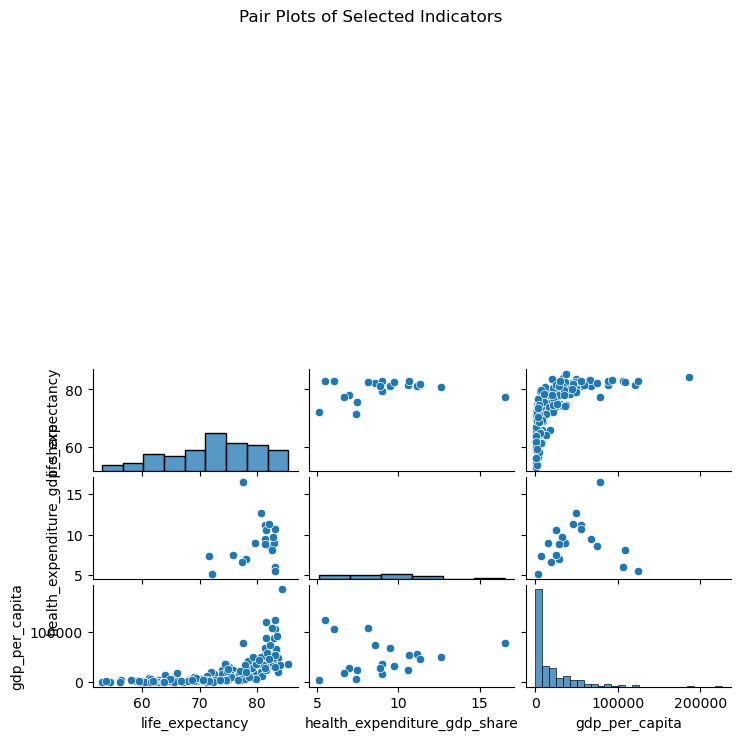

In [ ]:
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.suptitle("Pair Plots of Selected Indicators")
plt.subplots_adjust(top=0.5)
plt.show()

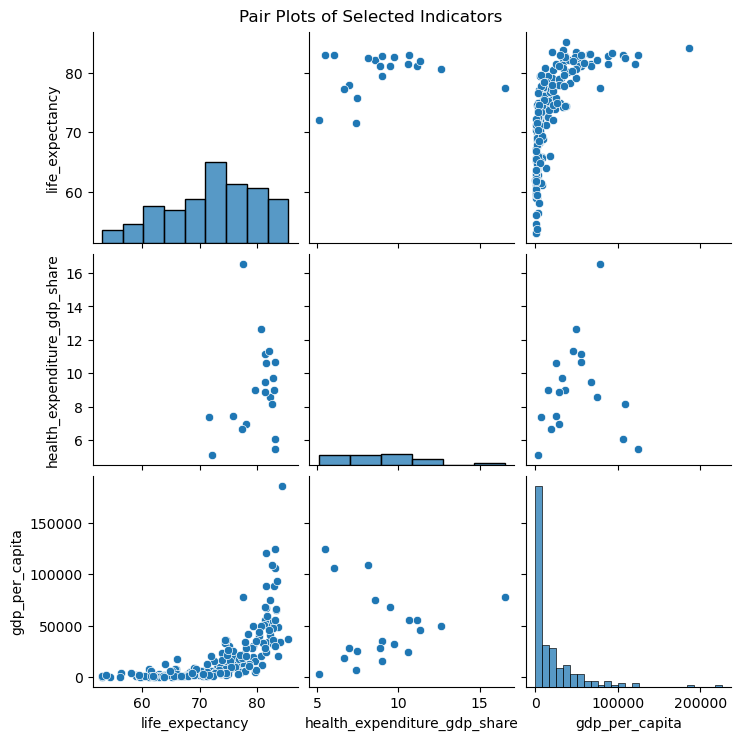

In [ ]:
sns.pairplot(df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']])
plt.suptitle("Pair Plots of Selected Indicators")
plt.subplots_adjust(top=0.95)
plt.show()

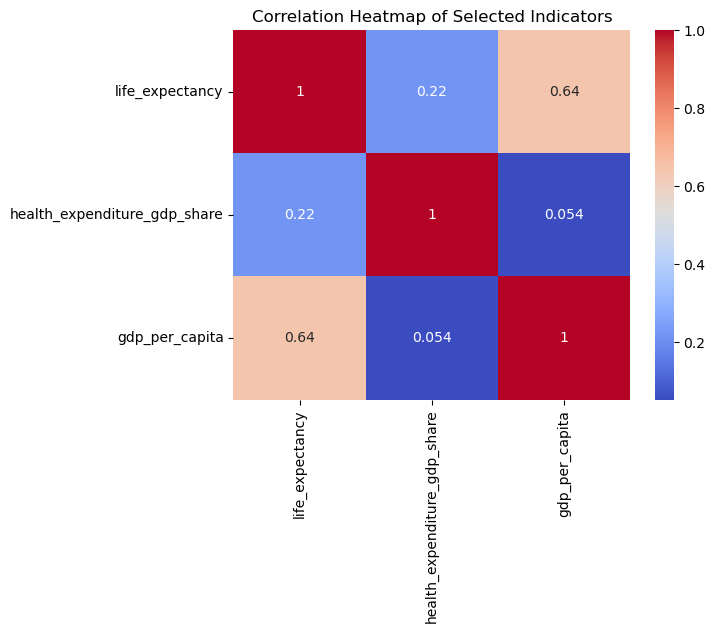

In [ ]:
corr_matrix = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Indicators")
plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = df[['life_expectancy', 'health_expenditure_gdp_share', 'gdp_per_capita']].describe()

# Create a table with key statistics
key_stats = summary_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Display the table
print(key_stats)

      life_expectancy  health_expenditure_gdp_share  gdp_per_capita
mean        72.416519                      9.044045    20520.336828
std          7.713322                      2.703549    30640.741594
min         52.997000                      5.100000      250.634225
25%         66.782000                      7.263266     2599.752468
50%         73.514634                      8.925000     7606.237525
75%         78.475000                     10.632500    27542.145523
max         85.377000                     16.571152   226052.001905
